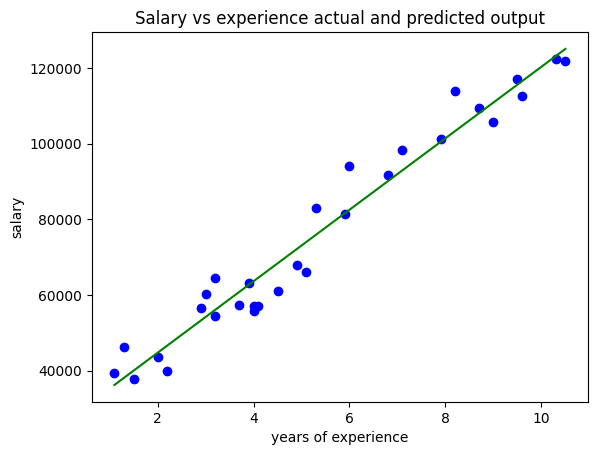

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,YearsExperience,Predicted Salry
0,25.0,262041.258235
1,30.3,312126.058539
2,21.0,224241.408949
3,2.5,49417.106002
4,1.8,42802.132377
5,28.6,296061.122592


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/ameenmanna8824/DATASETS/main/Salary_Data.csv'
data = pd.read_csv(url)
data.head()

#Assign the input data to a new variable x and output data to variable y
x = data.iloc[:,0:1]
y = data.iloc[:,1]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
y_pred

#Visualize the actual and predicted outputs
plt.scatter(x, y, c ='blue')
plt.plot(x, y_pred, color ='green')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.title('Salary vs experience actual and predicted output')
plt.show()

#Get the accuracy
from sklearn.metrics import r2_score
r2_score(y, y_pred) * 100

#Test with new data
model.predict([[25]])

#Save the model using joblib library
import joblib
joblib.dump(model,'salary_predictor.pkl')

#Use the saved model
predictor = joblib.load('salary_predictor.pkl')

#Give new data
new_data = pd.DataFrame({'YearsExperience': [25,30.3,21,2.5,1.8,28.6]})
prediction = predictor.predict(new_data)
new_data['Predicted Salry'] = prediction
new_data

In [ ]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/master/adult.csv'
df = pd.read_csv(url)

#df.replace('?',np.nan)
df[df == '?'] = np.nan

for col in ['workclass', 'occupation', 'native.country']:
  df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

x = df.drop(['income'], axis=1)
y = df['income']

x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

from sklearn import preprocessing
categorical = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country']
for feature in categorical:
  le = preprocessing.LabelEncoder()
  X_train[feature] = le.fit_transform(X_train[feature])
  X_test[feature] = le.transform(X_test[feature])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)

X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score with all the features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8218


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

In [ ]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =0)
categorical = ['workclass','education','marital.status','occupation','relationship','race','sex']
for feature in categorical:
  le = preprocessing.LabelEncoder()
  X_train[feature] = le.fit_transform(X_train[feature])
  X_test[feature] = le.transform(X_test[feature])

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic Regression accuracy score with the first13 features: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with the first13 features: 0.8213


In [ ]:
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


Text(50.722222222222214, 0.5, 'True')

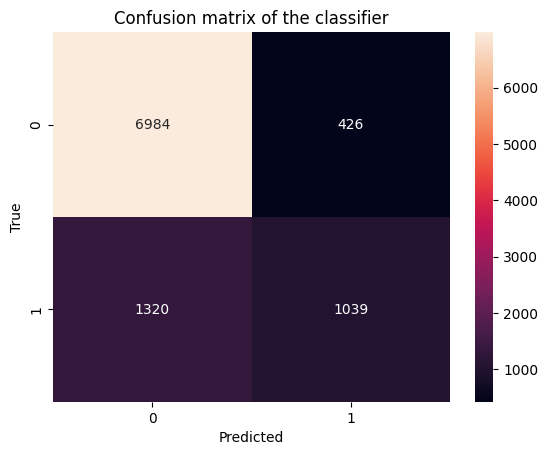

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')